In [1]:
import pandas

df = pandas.read_csv('../data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [3]:
# extract the data we're interested in
df = df[['UnitTests', 'JobSat']]
# remove missing values, there's no sensible way to fill in the blanks here
df = df.dropna()
df.head()

,UnitTests,JobSat
2,"No, but I think we should",Slightly satisfied
3,"No, but I think we should",Slightly satisfied
4,"Yes, it's part of our process",Slightly dissatisfied
5,"Yes, it's not part of our process but the deve...",Slightly satisfied
8,"Yes, it's not part of our process but the deve...",Slightly satisfied


In [4]:
num_sats = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

sat_to_num = lambda row: num_sats.get(row['JobSat'])

In [5]:
# convert job satisfactions to numerical values 1-5
df['JobSatNum'] = df.apply(sat_to_num, axis=1)
df = df[['UnitTests', 'JobSatNum']]
df.head()

,UnitTests,JobSatNum
2,"No, but I think we should",4
3,"No, but I think we should",4
4,"Yes, it's part of our process",2
5,"Yes, it's not part of our process but the deve...",4
8,"Yes, it's not part of our process but the deve...",4


In [6]:
y = df['JobSatNum']

x = pandas.get_dummies(df['UnitTests'], prefix='UnitTests', prefix_sep='_', drop_first=False)
x.head()

,"UnitTests_No, and I'm glad we don't","UnitTests_No, but I think we should","UnitTests_Yes, it's not part of our process but the developers do it on their own","UnitTests_Yes, it's part of our process"
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
5,0,0,1,0
8,0,0,1,0


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

print(f'Length of dataset: {len(df)}')

Length of dataset: 62528


In [8]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=13)

# train a regression model
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

# predict for the testing data
y_preds = model.predict(x_test)

# score the predictions
score = r2_score(y_test, y_preds)

print(f'The r-squared score for the testing data is {score}')

The r-squared score for the testing data is 0.022160969384487417


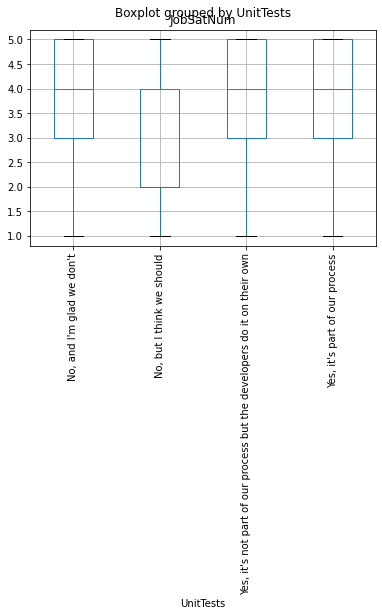

In [9]:
df.boxplot(column='JobSatNum', by='UnitTests', rot=90)

In [10]:
means = df.groupby(by='UnitTests', axis=0).mean()
variances = df.groupby(by='UnitTests', axis=0).var()

print(f'Mean job satisfactions for each unit test reply: {means}')
print()
print(f'Variances for each unit test reply: {variances}')

Mean job satisfactions for each unit test reply:                                                     JobSatNum
UnitTests                                                    
No, and I'm glad we don't                            3.713874
No, but I think we should                            3.419529
Yes, it's not part of our process but the devel...   3.723459
Yes, it's part of our process                        3.865377

Variances for each unit test reply:                                                     JobSatNum
UnitTests                                                    
No, and I'm glad we don't                            1.548239
No, but I think we should                            1.618975
Yes, it's not part of our process but the devel...   1.475238
Yes, it's part of our process                        1.465306


In [11]:
from textwrap import wrap

new_indexes = []
for index in means['JobSatNum'].index:
    new_indexes.append('\n'.join(wrap(index, 20)))

new_means = pandas.Series(means['JobSatNum'].values, new_indexes)
new_means

No, and I'm glad we\ndon't                                                    3.713874
No, but I think we\nshould                                                    3.419529
Yes, it's not part\nof our process but\nthe developers do it\non their own    3.723459
Yes, it's part of\nour process                                                3.865377
dtype: float64

Text(0, 0.5, 'Mean job satisfaction')

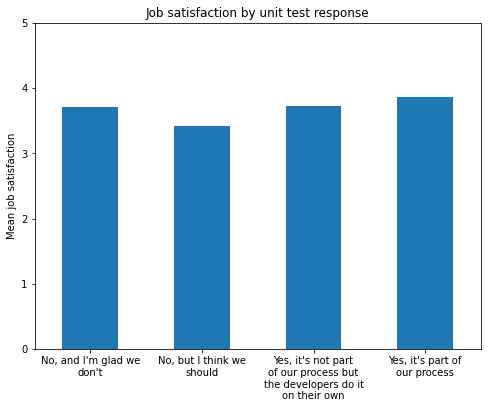

In [12]:
ax = new_means.plot.bar(figsize=(8, 6), ylim=(0, 5), rot=0)
ax.set_title('Job satisfaction by unit test response')
ax.set_ylabel('Mean job satisfaction')